# 3장 개별분석 - 영화관과 백화점

### 한글 설정

In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline

In [3]:
!pip install folium

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# 한글폰트를 설정합니다.
plt.rc('font', family='Malgun Gothic')
plt.rc("axes", unicode_minus=False) # - 가 깨지는 것을 방지

In [6]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트 설정'}>

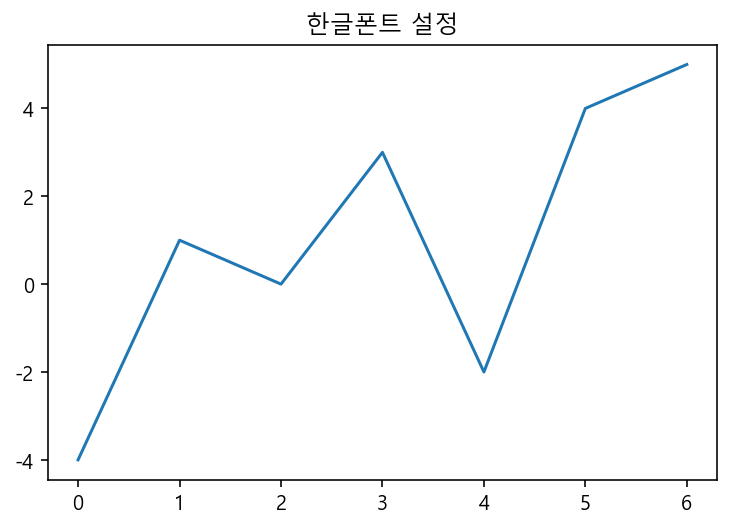

In [7]:
pd.Series([-4, 1, 0, 3, -2, 4, 5]).plot(title="한글폰트 설정")

### 데이터 불러오기

In [8]:
import os
forders = os.listdir('C:/Users/soyun/Desktop/소상공인')

In [9]:
cd C:/Users/soyun/Desktop/소상공인

C:\Users\soyun\Desktop\소상공인


In [10]:
import glob

df_list = []

for x in sorted(glob.glob("C:/Users/soyun/Desktop/소상공인/*.csv")):
    temp = pd.read_csv(x)
    df_list.append(temp)
    
df = pd.concat(df_list, axis = 0)
df.shape

(4200993, 39)

In [11]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,...,도로명,건물본번지,건물부번지,건물관리번호,건물명,구우편번호,신우편번호,동정보,층정보,호정보
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200993 entries, 0 to 96932
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상호명        object 
 1   상권업종대분류명   object 
 2   상권업종중분류명   object 
 3   상권업종소분류명   object 
 4   시도명        object 
 5   시군구명       object 
 6   행정동명       object 
 7   법정동명       object 
 8   도로명주소      object 
 9   경도         float64
 10  위도         float64
 11  상가업소번호     float64
 12  지점명        object 
 13  상권업종대분류코드  object 
 14  상권업종중분류코드  object 
 15  상권업종소분류코드  object 
 16  표준산업분류코드   object 
 17  표준산업분류명    object 
 18  시도코드       float64
 19  시군구코드      float64
 20  행정동코드      float64
 21  법정동코드      float64
 22  지번코드       float64
 23  대지구분코드     float64
 24  대지구분명      object 
 25  지번본번지      float64
 26  지번부번지      float64
 27  지번주소       object 
 28  도로명코드      float64
 29  도로명        object 
 30  건물본번지      float64
 31  건물부번지      float64
 32  건물관리번호     object 
 33  건물명        object 
 34  구우편번호      float64
 

<AxesSubplot:>

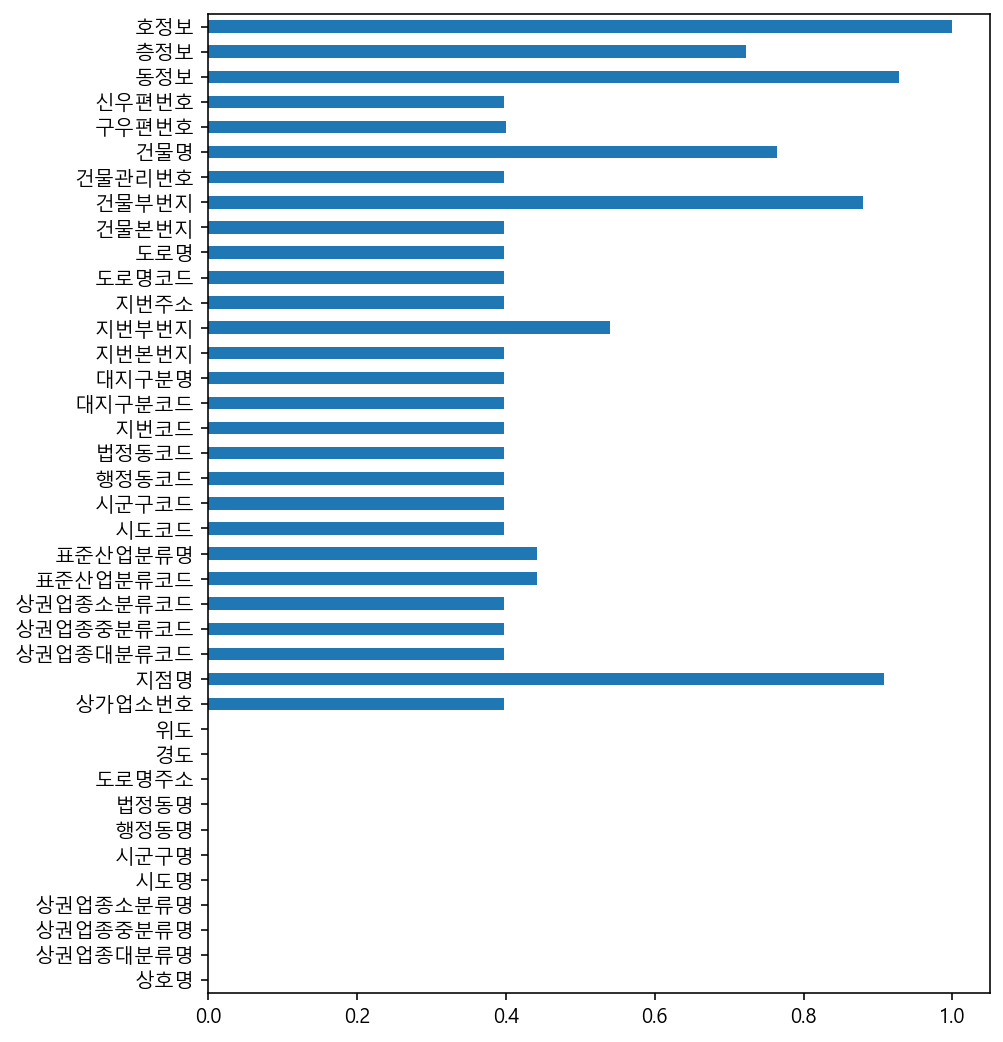

In [13]:
df.isnull().mean().plot.barh(figsize=(7, 9))

### 데이터 정리

In [14]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
print(df.shape)
df = df[columns].copy()
df.shape

(4200993, 39)


(4200993, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200993 entries, 0 to 96932
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상호명       object 
 1   상권업종대분류명  object 
 2   상권업종중분류명  object 
 3   상권업종소분류명  object 
 4   시도명       object 
 5   시군구명      object 
 6   행정동명      object 
 7   법정동명      object 
 8   도로명주소     object 
 9   경도        float64
 10  위도        float64
dtypes: float64(2), object(9)
memory usage: 384.6+ MB


In [16]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
print(df_seoul.shape)
df_seoul.head()

(2045840, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375


In [17]:
df_seoul.to_csv("seoul_open_store.csv", index=False)

In [18]:
pd.read_csv("seoul_open_store.csv").head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,서울특별시 종로구 서순라길 17-10,126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375


### 백화점과 영화관 데이터 뽑기

In [19]:
df_seoul["상권업종중분류명"].unique()

array(['건강/미용식품', '취미/오락관련소매', '시계/귀금속소매', '학원-보습교습입시', '한식', '유흥주점',
       '학원-창업취업취미', '자동차/자동차용품', '부동산중개', '사진/광학/정밀기기소매', '도서관/독서실',
       '커피점/카페', '대중목욕탕/휴게', '주유소/충전소', '패스트푸드', '닭/오리요리', '자동차/이륜차',
       '선물/팬시/기념품', '이/미용/건강', '사무/문구/컴퓨터', '중식', 'PC/오락/당구/볼링등',
       '음/식료품소매', '종합소매점', '세탁/가사서비스', '기타서비스업', '의복의류', '가방/신발/액세서리',
       '양식', '제과제빵떡케익', '무도/유흥/가무', '가정/주방/인테리어', '운동/경기용품소매',
       '학원-예능취미체육', '학원기타', '가전제품소매', '유아교육', '물품기기대여', '학문교육기타', '기타판매업',
       '사진', '분식', '화장품소매', '애견/애완/동물', '학원-음악미술무용', '대행업',
       '철물/난방/건설자재소매', '별식/퓨전요리', '주택수리', '연극/영화/극장', '모텔/여관/여인숙',
       '호텔/콘도', '실내운동시설', '의약/의료품소매', '실외운동시설', '개인/가정용품수리', '학원-어학',
       '기타음식업', '광고/인쇄', '예식/의례/관혼상제', '일식/수산물', '책/서적/도서', '가구소매',
       '요가/단전/마사지', '운송/배달/택배', '인력/고용/용역알선', '평가/개발/관리', '법무세무회계',
       '운영관리시설', '부페', '개인서비스', '중고품소매/교환', '장례/묘지', '분양',
       '예술품/골동품/수석/분재', '유아용품', '페인트/유리제품소매', '행사/이벤트', '스포츠/운동',
       '음식배달서비스', '놀이/여가/취미', '종교용품판매', '민박/하숙', '경마/경륜/성인

In [20]:
df_seoul["상권업종소분류명"].unique()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


array(['건강원', '악기판매', '시계/귀금속', '학원-입시', '한식/백반/한정식', '민속주점', '학원-디자인',
       '타이어판매', '부동산중개', '카메라판매', '족발/보쌈전문', '곱창/양구이전문', '독서실',
       '커피전문점/카페/다방', '욕탕업-종합', '주유소', '토스트전문', '삼계탕전문', '자동차정비/카센타',
       '핸드폰소매', '꽃집/꽃배달', '비만/피부관리', '사무용기기소매', '중국음식/중국집', '세차장', '기원',
       '얼음가게', '편의점', '세탁소/빨래방', '패션디자인', '아동복판매', '수퍼마켓', '컴퓨터/사무용기기종합',
       '청소/소독', '가방/가죽제품소매', '섬유/직물/주단', '정육점', '종합소매', '패밀리레스토랑', '제과점',
       '양품점', '노래방', '지물판매', '일반의류', '인테리어/욕실용품/커튼', '백화점', '사무/문구용품',
       '운동/경기용품', '레크레이션지도/상담', '컴퓨터/주변기기', '학원(종합)', '일반가전제품', '인터넷PC방',
       '어린이집', '떡전문', '여성미용실', '렌트카', '운동/코치학교', '통신판매', '사진관',
       '부대찌개/섞어찌개', '주방가구판매', '국수/만두/칼국수', '사업경영상담', '화장품판매점', '청과물소매',
       '안경원', '애견/애완/동물사육판매', '등산용품판매', '피아노/바이올린/기타', '이민유학알선',
       '셔터/새시판매', '죽전문점', '호프/맥주', '빠/카페/스탠드빠', '캐쥬얼/스포츠의류', '주택수리종합',
       '도시락전문점', '해장국/감자탕', '연극/음악/예술관련기타', '두부요리전문', '모텔/여관/여인숙',
       '호텔/콘도', '건강식품판매', '실내골프연습장', '육류소매', '보청기판매', '골프장', '침구/수예품',
       '파전전문', '비디

영화관 데이터

In [21]:
df_seoul_m= df_seoul[(df_seoul["상권업종중분류명"] == "연극/영화/극장")]
df_seoul_m.tail()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
377467,춤추는프로덕션,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,용산구,한남동,한남동,서울특별시 용산구 우사단로10다길 30,127.002486,37.531764
377631,제이클레프,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,마포구,망원1동,망원동,서울특별시 마포구 희우정로10길 28,126.905460,37.553124
377642,이상한댄스컴퍼니,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,성북구,정릉3동,정릉동,서울특별시 성북구 정릉로10가길 6-31,127.000023,37.606881
377650,이은자무용연습실,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,서초구,방배3동,방배동,서울특별시 서초구 방배로 58,126.999026,37.479961
377657,세전무용단,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,양천구,신정3동,신정동,서울특별시 양천구 중앙로39길 22-3,126.849852,37.519528


In [22]:
df_seoul_m["상권업종소분류명"].value_counts()

연극/음악/예술관련기타    4980
음악감상              33
Name: 상권업종소분류명, dtype: int64

In [23]:
df_seoul_m[df_seoul_m["상권업종소분류명"].isin(["음악감상"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
45584,서울모테트합창단,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,서초구,서초1동,서초동,서울특별시 서초구 서초중앙로 64,127.015153,37.487431
82548,홍이연습실,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,서대문구,홍제2동,홍제동,서울특별시 서대문구 세무서2길 22,126.946731,37.588748
146636,헤비메탈,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,마포구,서강동,상수동,서울특별시 마포구 와우산로 18,126.923083,37.545934
202804,서울모테트합창단,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,서초구,서초1동,서초동,서울특별시 서초구 서초중앙로 64,127.015153,37.487431
239768,홍이연습실,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,서대문구,홍제2동,홍제동,서울특별시 서대문구 세무서2길 22,126.946731,37.588748
303856,헤비메탈,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,마포구,서강동,상수동,서울특별시 마포구 와우산로 18,126.923083,37.545934
318923,압구정음악실,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,강남구,압구정동,압구정동,서울특별시 강남구 압구정로29길 72-1,127.028390,37.532278
359588,엠플사운드합주실,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,강남구,역삼2동,역삼동,서울특별시 강남구 논현로 404,127.039409,37.496208
359589,레드스튜디오,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,서초구,양재1동,양재동,서울특별시 서초구 양재천로23길 7,127.040954,37.477939
580528,서울모테트합창단,관광/여가/오락,연극/영화/극장,음악감상,서울특별시,서초구,서초1동,서초동,서울특별시 서초구 서초중앙로 64,127.015153,37.487431


In [24]:
df_seoul_m = df_seoul_m[~df_seoul_m["상권업종소분류명"].isin(["음악감상"])].copy()
df_seoul_m.shape

(4980, 11)

백화점 데이터 생성

In [25]:
df_seoul_d1= df_seoul[(df_seoul["상권업종소분류명"] == "백화점")]
df_seoul_d1.shape

(1978, 11)

In [26]:
df_seoul_d2= df_seoul[(df_seoul["상권업종소분류명"] == "면세백화점")]
df_seoul_d2.shape

(68, 11)

In [27]:
df_seoul_d = pd.concat([df_seoul_d1,df_seoul_d2])
df_seoul_d.shape

(2046, 11)

### 데이터분석 

In [28]:
df_seoul_m["분야"] = "영화"

In [29]:
df_seoul_m.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,분야
143,오유아트홀,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,강남구,도곡2동,도곡동,서울특별시 강남구 남부순환로378길 34-9,127.046387,37.483713,영화
481,강남윈드오케스트라,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,서초구,서초1동,서초동,서울특별시 서초구 효령로57길 4,127.017045,37.485410,영화
1007,현대기아자동차아트홀,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,서초구,양재2동,양재동,서울특별시 서초구 헌릉로 12,127.042654,37.464355,영화
3564,땀,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,성북구,동선동,동선동2가,서울특별시 성북구 보문로32길 79,127.020578,37.590556,영화
4417,파주필하모닉오케스트라,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 신촌로 201,126.948138,37.557171,영화


In [30]:
df_seoul_d["분야"] = "백화점"

In [31]:
df_seoul_d.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,분야
70,세원아이티씨신세계백화점본점,소매,종합소매점,백화점,서울특별시,중구,회현동,충무로1가,서울특별시 중구 퇴계로 77,126.980759,37.560349,백화점
702,쌍계명차,소매,종합소매점,백화점,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로 83,126.935828,37.556069,백화점
2647,디디에두보,소매,종합소매점,백화점,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로 517,127.059745,37.508608,백화점
2760,진서,소매,종합소매점,백화점,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로 517,127.059745,37.508608,백화점
3385,한국로얄코펜하겐롯데백화점본점,소매,종합소매점,백화점,서울특별시,중구,소공동,소공동,서울특별시 중구 을지로 30,126.980985,37.565334,백화점


In [32]:
#데이터프레임 합치기

In [33]:
df= pd.concat([df_seoul_d,df_seoul_m])
df

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,분야
70,세원아이티씨신세계백화점본점,소매,종합소매점,백화점,서울특별시,중구,회현동,충무로1가,서울특별시 중구 퇴계로 77,126.980759,37.560349,백화점
702,쌍계명차,소매,종합소매점,백화점,서울특별시,서대문구,신촌동,창천동,서울특별시 서대문구 신촌로 83,126.935828,37.556069,백화점
2647,디디에두보,소매,종합소매점,백화점,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로 517,127.059745,37.508608,백화점
2760,진서,소매,종합소매점,백화점,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로 517,127.059745,37.508608,백화점
3385,한국로얄코펜하겐롯데백화점본점,소매,종합소매점,백화점,서울특별시,중구,소공동,소공동,서울특별시 중구 을지로 30,126.980985,37.565334,백화점
...,...,...,...,...,...,...,...,...,...,...,...,...
377467,춤추는프로덕션,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,용산구,한남동,한남동,서울특별시 용산구 우사단로10다길 30,127.002486,37.531764,영화
377631,제이클레프,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,마포구,망원1동,망원동,서울특별시 마포구 희우정로10길 28,126.905460,37.553124,영화
377642,이상한댄스컴퍼니,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,성북구,정릉3동,정릉동,서울특별시 성북구 정릉로10가길 6-31,127.000023,37.606881,영화
377650,이은자무용연습실,관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,서초구,방배3동,방배동,서울특별시 서초구 방배로 58,126.999026,37.479961,영화


In [34]:
df_count = df["분야"].value_counts()
df_count

영화     4980
백화점    2046
Name: 분야, dtype: int64

<AxesSubplot:>

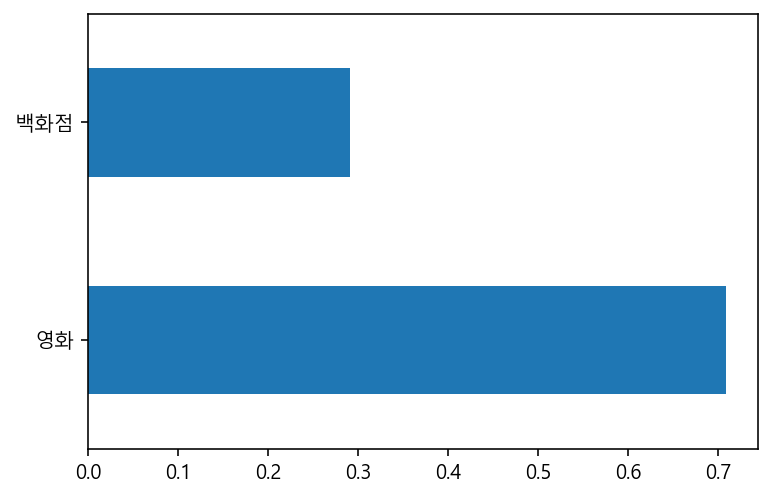

In [35]:
df["분야"].value_counts(normalize=True).plot.barh()

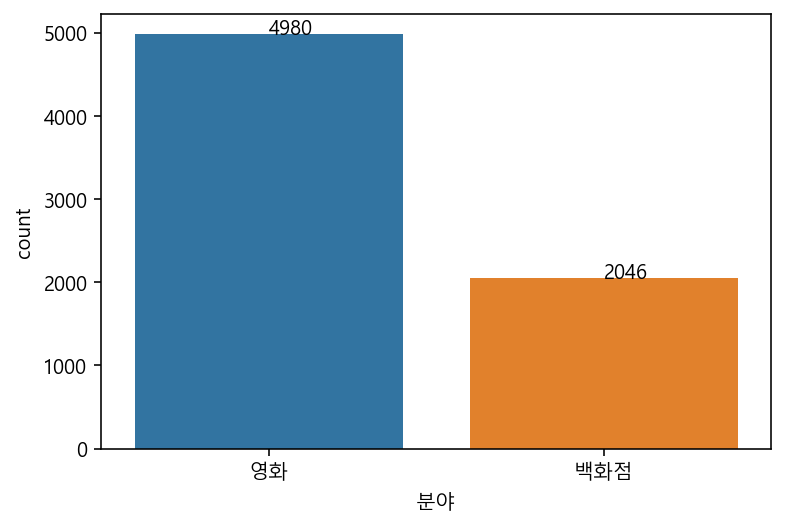

In [36]:
g = sns.countplot(data=df, x="분야", order = ['영화','백화점'])

for i, val in enumerate(df_count.index):
    g.text(x=i, y=df_count[i], s=df_count[i])

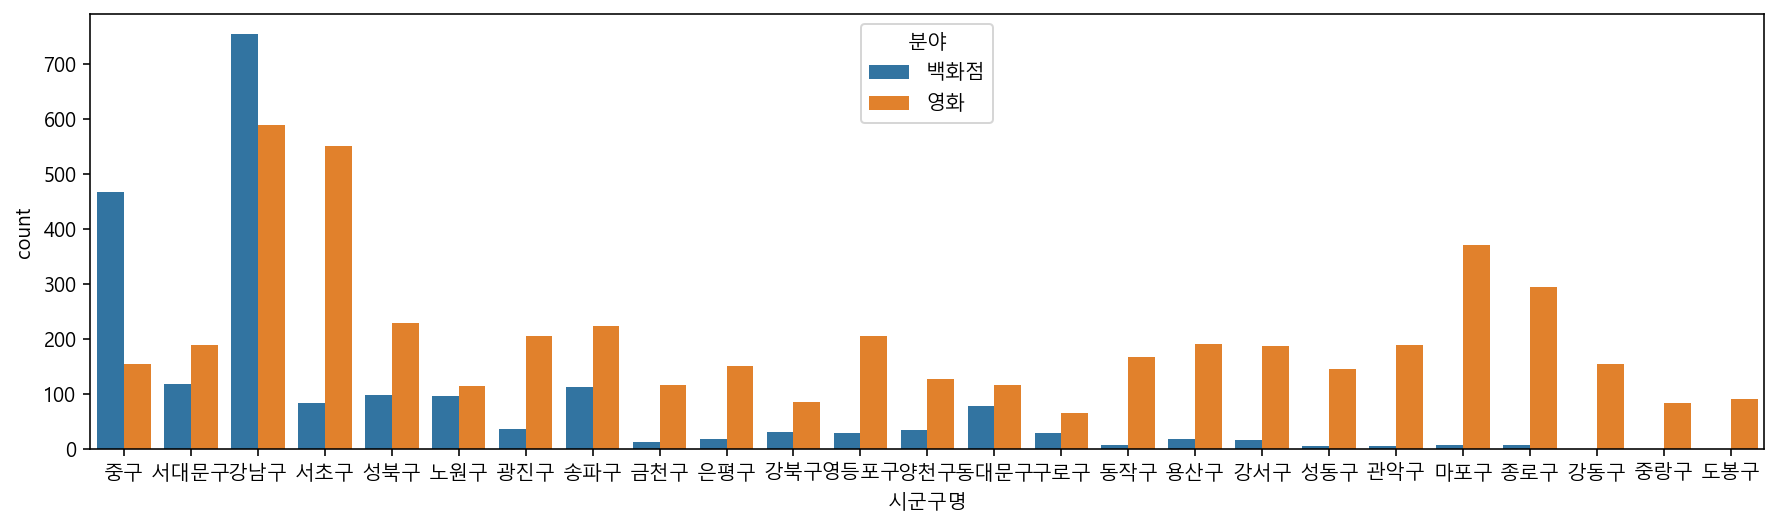

In [37]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df, x="시군구명", hue="분야")

In [38]:
table_city_brand = df.pivot_table(index="시군구명", columns="분야", values="상호명", aggfunc="count")
table_city_brand.head()

분야,백화점,영화
시군구명,,
강남구,753.0,589.0
강동구,NaN,154.0
강북구,30.0,85.0
강서구,16.0,187.0
관악구,5.0,189.0


In [39]:
for i, val in table_city_brand.iterrows():
    depart = val["백화점"]
    movie = val["영화"]
    print(depart, movie)

753.0 589.0
nan 154.0
30.0 85.0
16.0 187.0
5.0 189.0
36.0 204.0
28.0 64.0
12.0 116.0
96.0 113.0
nan 90.0
77.0 115.0
6.0 167.0
6.0 371.0
118.0 189.0
82.0 551.0
5.0 145.0
97.0 228.0
112.0 223.0
33.0 126.0
28.0 204.0
17.0 190.0
17.0 151.0
6.0 294.0
466.0 153.0
nan 82.0


In [40]:
df.notnull().sum()

상호명         7026
상권업종대분류명    7026
상권업종중분류명    7026
상권업종소분류명    7026
시도명         7026
시군구명        7026
행정동명        7026
법정동명        7026
도로명주소       7026
경도          7026
위도          7026
분야          7026
dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


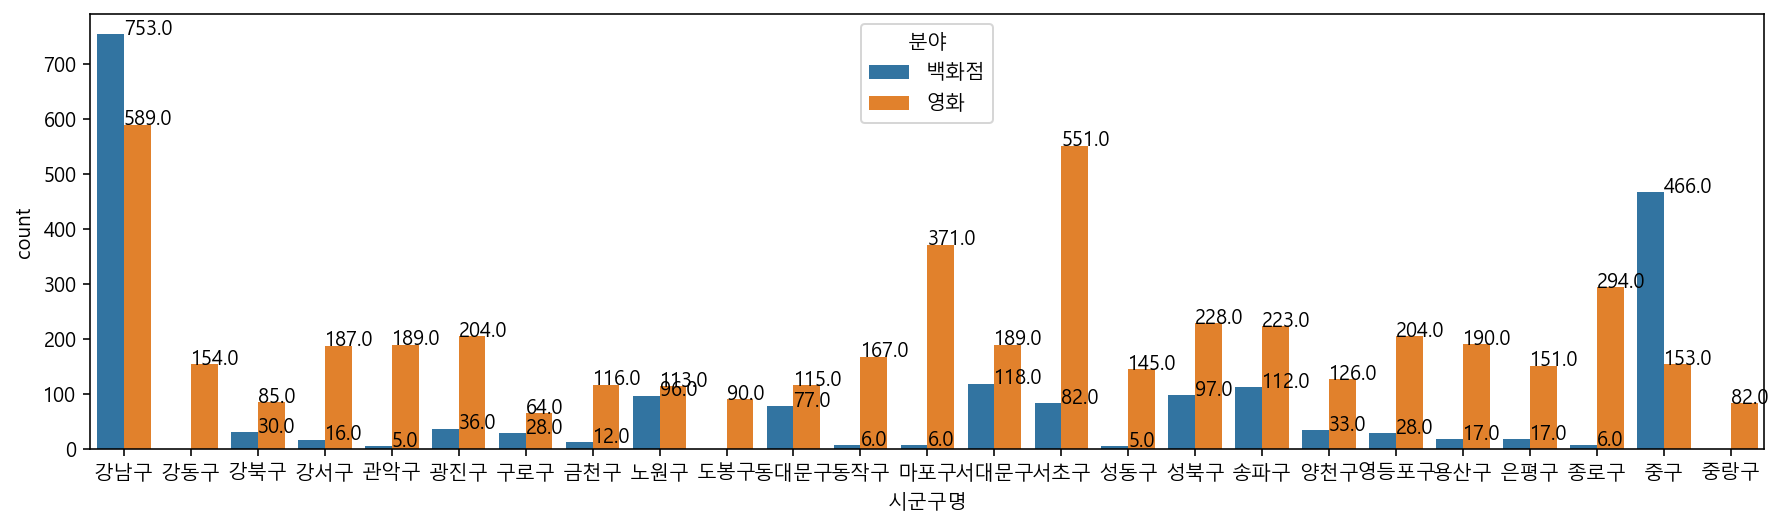

In [41]:
plt.figure(figsize=(15, 4))
# 위에서 만든 피봇테이블과 "시군구명"의 순서과 같게 표시되게 하기 위해 order 값을 지정합니다.
g = sns.countplot(data=df, x="시군구명", hue="분야", order=table_city_brand.index)

# 여기에서 i 값은 시군구명이라 숫자로 표현해줄 필요가 있습니다.
# 그래서 순서대로 0번부터 찍어줄 수 있도록 index_no 를 만들어 주고 for문을 순회할 때마다 하나씩 증가시킵니다.
index_no = 0
for i, val in table_city_brand.iterrows():
    depart = val["백화점"]
    movie = val["영화"]
    g.text(x=index_no, y=depart, s=depart)
    g.text(x=index_no, y=movie, s=movie)
    index_no = index_no + 1

<AxesSubplot:xlabel='경도', ylabel='위도'>

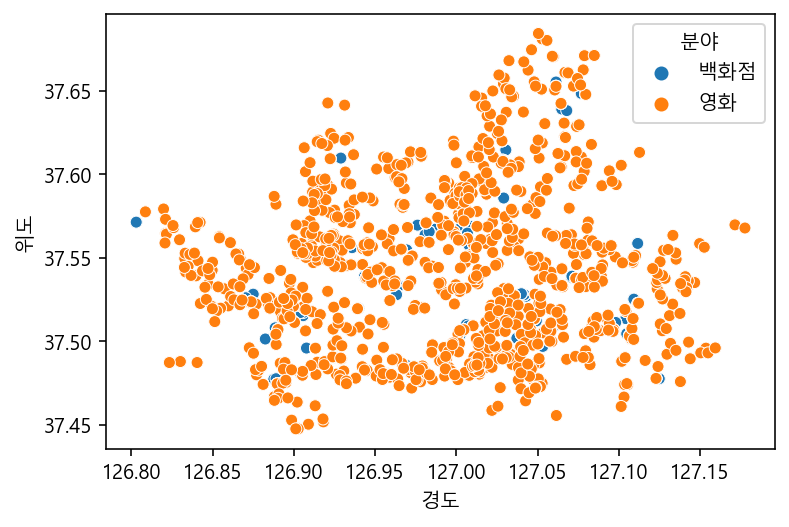

In [42]:
sns.scatterplot(data=df, x="경도", y="위도", hue="분야")

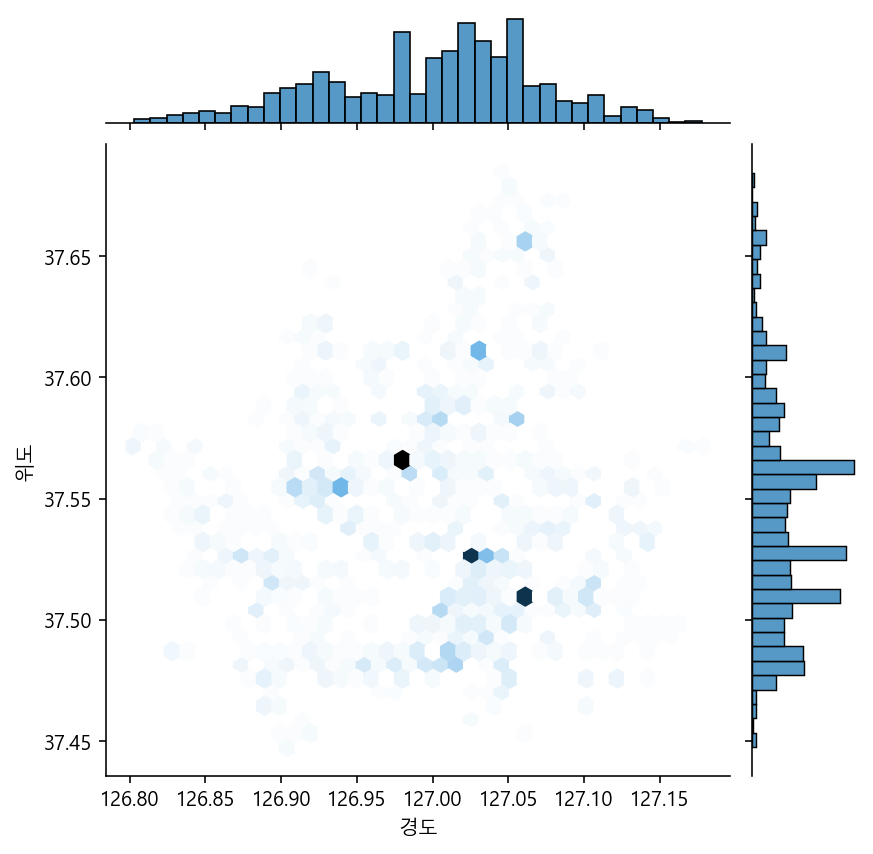

In [43]:
sns.jointplot(data=df, x="경도", y="위도", kind="hex")

### 지도에 나타내기

In [44]:
import folium

In [45]:
lat = df["위도"].mean()
long = df["경도"].mean()
lat, long

(37.54233844122914, 126.99945571736545)

In [46]:
df.index

Int64Index([    70,    702,   2647,   2760,   3385,   3501,   3620,   3766,
              4108,   4177,
            ...
            376505, 376562, 376883, 377044, 377059, 377467, 377631, 377642,
            377650, 377657],
           dtype='int64', length=7026)

In [47]:
m = folium.Map([lat, long], zoom_start=12)

for i in df_bread.index:
    
    sub_lat = df.loc[i, "위도"]
    sub_long = df.loc[i, "경도"]
    title = df.loc[i, "상호명"] + " - " + df.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df.loc[i, "분야"] == "백화점":
        icon_color = "red"
    
    folium.Marker(
        [sub_lat, sub_long], 
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

m.save('index.html')
m

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 백화점, 영화관 구분

In [ ]:
df_seoul_d.shape

In [ ]:
df_seoul_m.head(15)

In [ ]:
df_seoul_m['상호명_소문자'] = df_seoul_m["상호명"].str.lower()

In [ ]:
df_seoul_d['상호명_소문자'] = df_seoul_d["상호명"].str.lower()

In [ ]:
df_seoul_m[df_seoul_m["상호명_소문자"].str.contains('cgv|메가')].shape 

In [ ]:
df_seoul_m[df_seoul_m["상호명_소문자"].str.contains('LOTTE|lotte|Lotte|롯데|메가박스|Mega|MEGA')].shape #롯데, 메가가 검색이 안 된다...

In [ ]:
df_seoul_d[df_seoul_d["상호명_소문자"].str.contains('시네마|롯데|신세계|현대|nc|갤러리아')].shape

In [ ]:
df_1 = pd.concat([df_seoul_d,df_seoul_m])
df_1.shape

In [ ]:
df1 = df_1[df_1["상호명_소문자"].str.contains(
    '롯데|신세계|현대|nc|갤러리아|cgv')].copy()

In [ ]:
df1.shape

In [ ]:
df1.head()

In [ ]:
for i in range (0,388):
    for j in range (i+1,388):
        if (i['위도'] == j['위도']) and (i['경도'] == j['경도']):
            print(i['상호명'])